<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
# Получение суммы произведений
def sum_prod(X, V):
  result = 0
  for i in range(len(X)):
    result += X[i] @ V[i]
  return result

# Тесты
X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
V = [np.array([[1], [1]]), np.array([[2], [2]])]
print(np.array_equal(sum_prod(X, V), np.array([[25], [37]])))

X = [np.array([[3, 5], [17, 16]]), np.array([[4, 2], [15, 14]]), np.array([[6, 1], [13, 12]])]
V = [np.array([[2], [2]]), np.array([[3], [3]]), np.array([[4], [4]])]
print(np.array_equal(sum_prod(X, V), np.array([[62], [253]])))

True
True


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
# Бинаризация матрицы
def binarize(M, threshold=0.5):
  # Создание пустой матрицы
  binary_matrix = []

  # Заполнение матрицы
  for row in M:
    binary_row = [1 if val > threshold else 0 for val in row]
    binary_matrix.append(binary_row)

  return binary_matrix

# Тесты
mat = np.array([[0.1, 0.6, 0.4], [0.7, 0.3, 0.8], [0.2, 0.9, 0.5]])
print(np.array_equal(binarize(mat), np.array([[0, 1, 0], [1, 0, 1],[0, 1, 0]])))

mat = np.array([[12, 34, 58], [59, 43, 15], [98, 90, 1], [21, 80, 43]])
print(np.array_equal(binarize(mat, 50), np.array([[0, 0, 1], [1, 0, 0], [1, 1, 0], [0, 1, 0]])))

True
True


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [16]:
# Уникальные элементы в строках
def unique_rows(mat):
    return [list(set(row)) for row in mat]

# Уникальные элементы в столбцах
def unique_columns(mat):
    return [list(set(col)) for col in zip(*mat)]

# Тесты
mat = np.array([[2, 2, 4], [1, 1, 4], [1, 2, 2]])
print(unique_rows(mat) == [[2, 4], [1, 4], [1, 2]])
print(unique_columns(mat) == [[1, 2], [1, 2], [2, 4]])

mat = np.array([[1, 2], [2, 2], [1, 2], [2, 2], [2, 1]])
print(unique_rows(mat) == [[1, 2], [2], [1, 2], [2], [1, 2]])
print(unique_columns(mat) == [[1, 2], [1, 2]])

True
True
True
True


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Мат. ожидание по строкам: [ 0.02165727 -0.29842181 -0.27502467 -0.0369708   0.68246978  0.6594684
 -0.0741099 ]
Дисперсия по строкам: [1.15125611 0.98550206 0.1568969  0.51774442 0.19868041 0.1416155
 0.5560471 ]
Мат. ожидание по столбцам: [ 0.35500078 -0.19154842  0.59524181 -0.37065516]
Дисперсия по столбцам: [0.73728812 0.49908576 0.42561389 0.41527118]


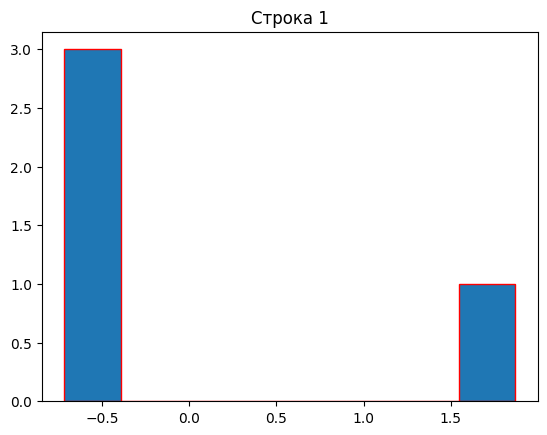

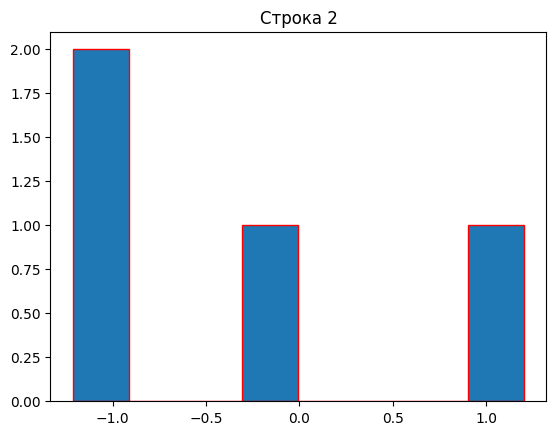

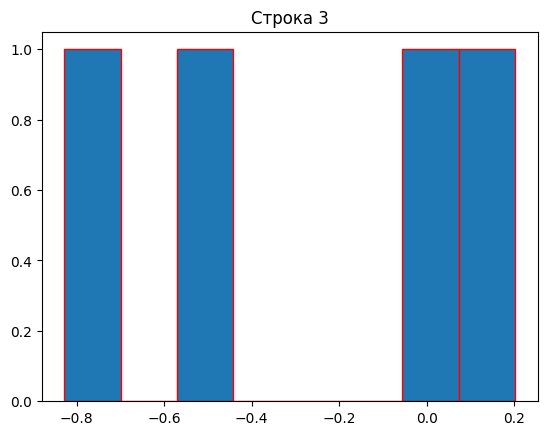

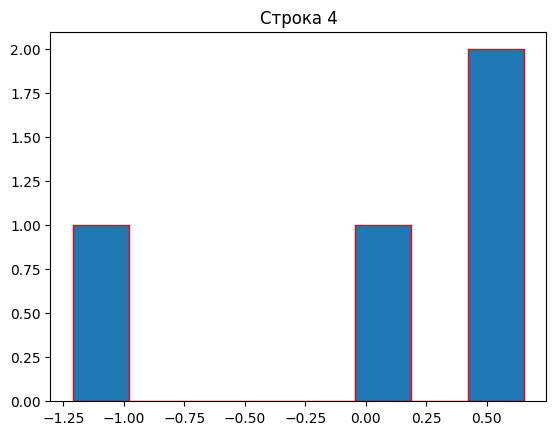

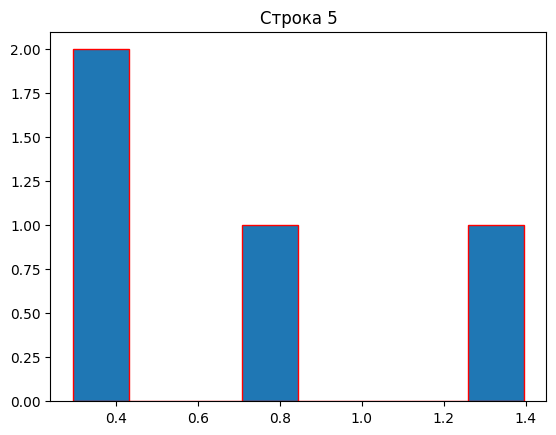

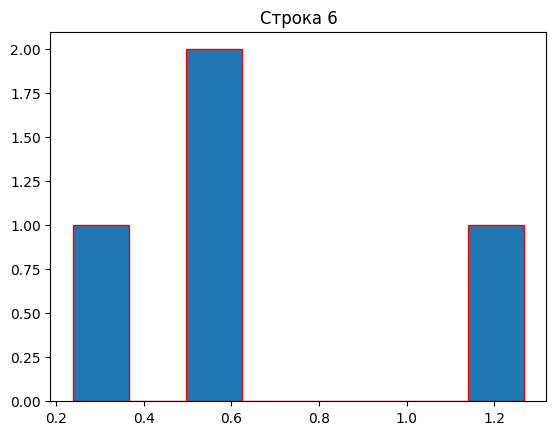

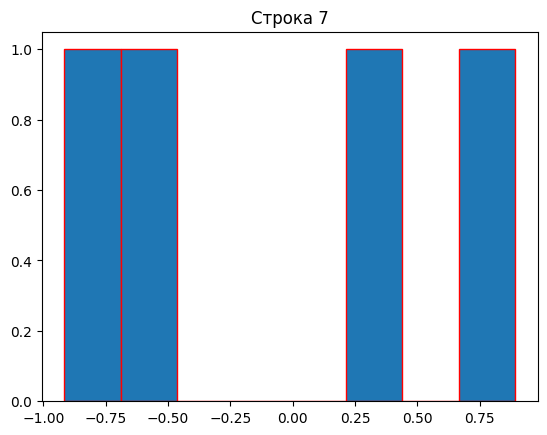

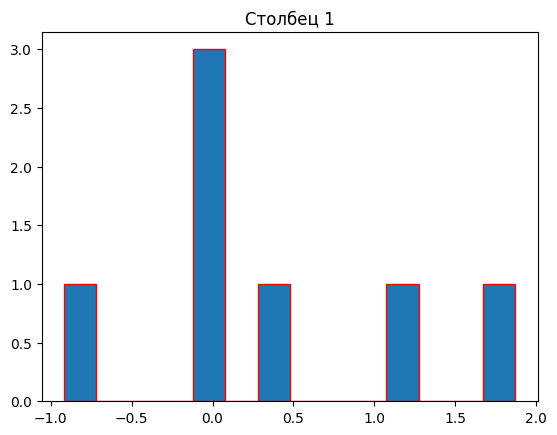

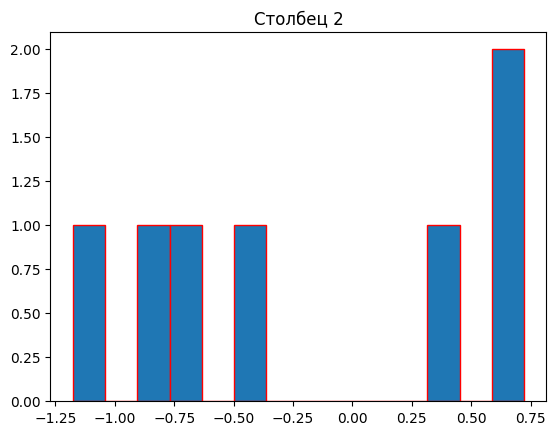

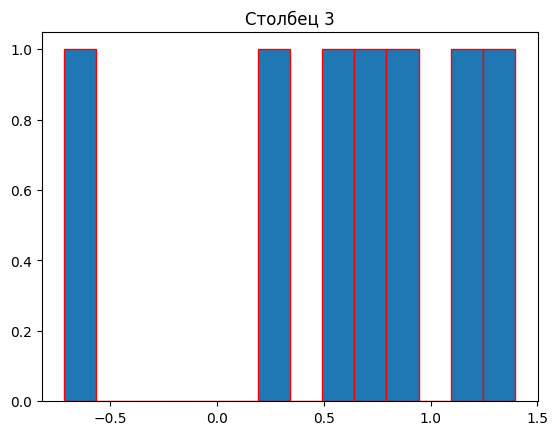

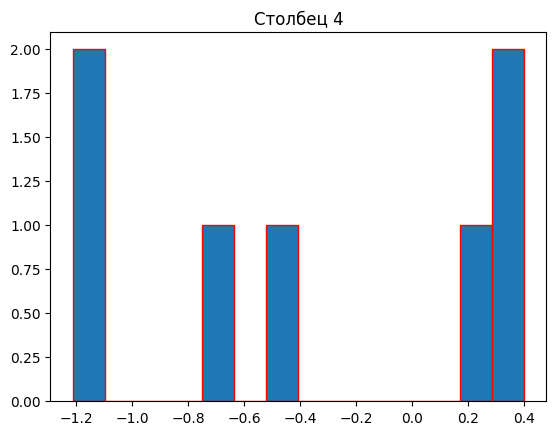

In [17]:
def task_4(m, n):
  # Заполнение случайными числами
  mat = np.random.randn(m, n)

  print(f"Мат. ожидание по строкам: {np.mean(mat, axis=1)}")
  print(f"Дисперсия по строкам: {np.var(mat, axis=1)}")
  print(f"Мат. ожидание по столбцам: {np.mean(mat, axis=0)}")
  print(f"Дисперсия по столбцам: {np.var(mat, axis=0)}")

  # Отрисовка гистограммы строк
  for i in range(m):
    plt.hist(mat[i], bins=n*2, ec="red")
    plt.title(f'Строка {i+1}')
    plt.show()

  # Отрисовка гистограммы столбцов
  for j in range(n):
    plt.hist(mat[:,j], bins=m*2, ec="red")
    plt.title(f'Столбец {j+1}')
    plt.show()

task_4(7, 4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [18]:
def chess(m, n, a, b):
  # Создание пустой матрицы
  mat = np.empty((m, n))

  # Заполнение матрицы
  for i in range(m):
    for j in range(n):
      mat[i, j] = a if (i + j) % 2 == 0 else b

  return mat

print(np.array_equal(chess(4, 3, 1, 0), np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0]])))

True


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

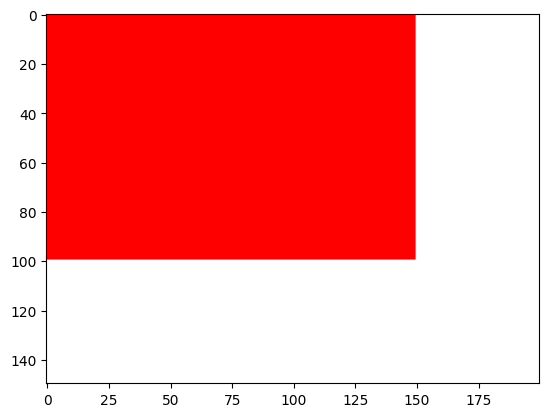

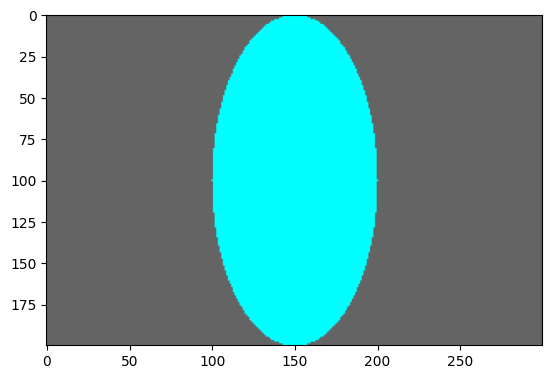

In [22]:
# Отрисовка прямоугольника
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
  # Создание матрицы
  image = np.zeros((m, n, 3), dtype=np.uint8)

  # Заливка окна
  image[:, :] = background_color

  # Заливка фигуры
  image[:a, :b] = rectangle_color

  plt.imshow(image)
  plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
  # Создание матрицы
  image = np.zeros((m, n, 3), dtype=np.uint8)

  # Заливка окна
  image[:, :] = background_color

  # Заливка фигуры
  for i in range(m):
    for j in range(n):
      if ((i-m/2)**2)/(a**2) + ((j - n/2)**2)/(b**2) <= 1:
        image[i, j] = ellipse_color

  plt.imshow(image)
  plt.show()


draw_rectangle(100, 150, 150, 200, (255, 0, 0), (255, 255, 255))
draw_ellipse(100, 50, 200, 300, (0,255, 255), (100, 100, 100))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [31]:
def time_series_info(time_series, p):
  print(f"Мат. ожидание: {np.mean(time_series)}")
  print(f"Дисперсия: {np.var(time_series)}")
  print(f"СКО: {np.std(time_series)}")
  print(f"Локальные максимумы: {[time_series[i] for i in range(1, len(time_series) - 1) if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]]}")
  print(f"Локальные минимумы: {[time_series[i] for i in range(1, len(time_series) - 1) if time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]]}")
  print(f"Скозьзящее среднее: {np.convolve(time_series, np.ones(p)/p, 'valid')}")


time_series_info(np.array([1, 7, 4, 5, 6, 8, 9, 3, 8, 4, 5, 6, 3]), 3)

Мат. ожидание: 5.3076923076923075
Дисперсия: 4.982248520710058
СКО: 2.232095096699524
Локальные максимумы: [7, 9, 8, 6]
Локальные минимумы: [4, 3, 4]
Скозьзящее среднее: [4.         5.33333333 5.         6.33333333 7.66666667 6.66666667
 6.66666667 5.         5.66666667 5.         4.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [24]:
def one_hot_encoding(vector):
  # Получение максимального числа класса
  num_classes = np.max(vector) + 1

  # Получение one_hot_encoding
  encoding = np.zeros((len(vector), num_classes))
  encoding[np.arange(len(vector)), vector] = 1
  return encoding

print(one_hot_encoding(np.array([0, 2, 3, 0])))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
